# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [ ]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [ ]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [ ]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = []

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    
    plt.show()

In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

In [ ]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

array([0.00000000e+00, 3.25191619e-06, 6.50383238e-06, ...,
       9.99993496e-01, 9.99996748e-01, 1.00000000e+00])

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

In [ ]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


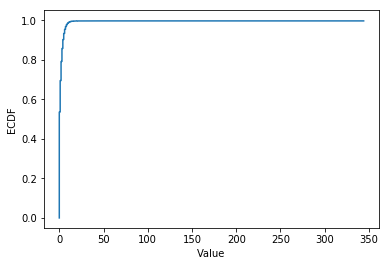

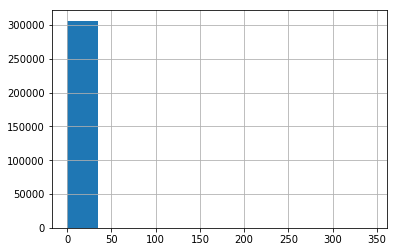

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [200]:
# 最大值落在分布之外
print(app_f['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
'''
Your Code Here
'''

cdf = distributions.ECDF(app_f['OBS_60_CNT_SOCIAL_CIRCLE'])


plt.plot(cdf.x, cdf.y)
plt.xlabel('Value')
plt.ylabel('ECDF')
#plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_f['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_f['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [ ]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = 
loc_b = 

app_train.loc[loc_a, loc_b].hist()
plt.show()

# 作業

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
app = pd.read_csv('C:/Users/hsu/Desktop/application_train.csv')

In [5]:
# 選取「float64」資料
floatcol = []
for i in app.columns:
    if app[i].dtype == 'float64':
        floatcol.append(i)
        
app_f = app[floatcol]

DEL OO
DEL OO
DEL OO
DEL OO
DEL OO
DEL OO


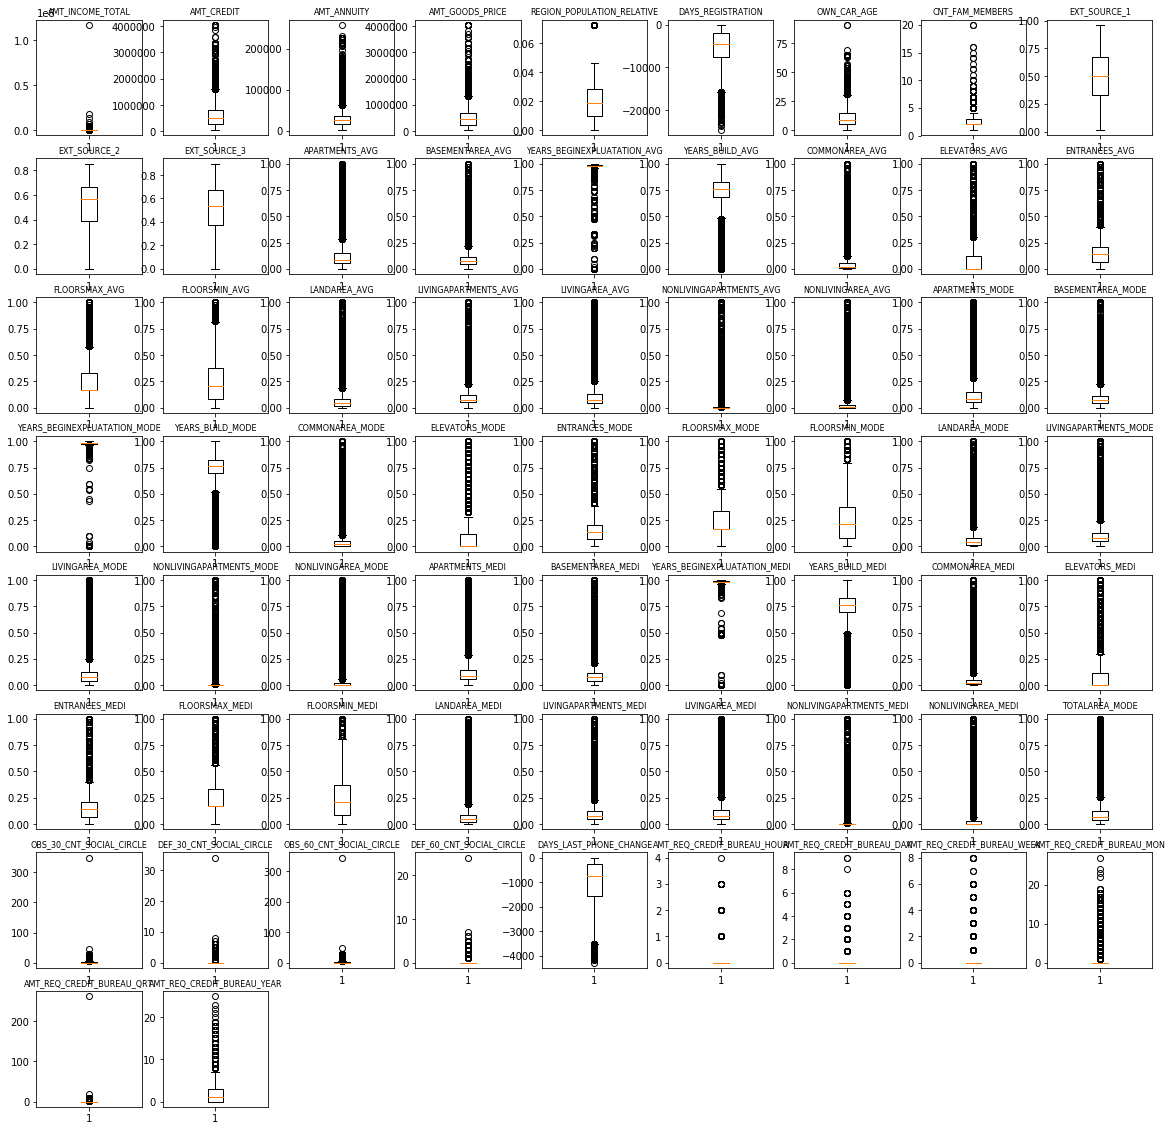

In [338]:
# 繪製所有「float64」資料boxplot
plt.figure(figsize=(20, 20))
for i in range(len(floatcol)):
    plt.subplot(8, 9, i+1)
    plt.boxplot(app_f[floatcol[i]].dropna()) # boxplot 如遇na值，無法呈現，因此先以「跳過」na值的方式呈現，其它數值
    plt.title(floatcol[i], size = 8)

In [ ]:
# 選取標準差過大欄位
stdlist = []
for i in app_f.columns:
    MaxMin = app_f[i].quantile(np.arange(0,1.25,0.25))[1] - app_f[i].quantile(np.arange(0,1.25,0.25))[0.75] # 計算Q4 - Q3之值
    if MaxMin > app_f[i].std() * 80: # 將相差大於80倍標準差之欄位選出
        stdlist.append(i)

In [339]:
stdlist

['AMT_INCOME_TOTAL',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_QRT']

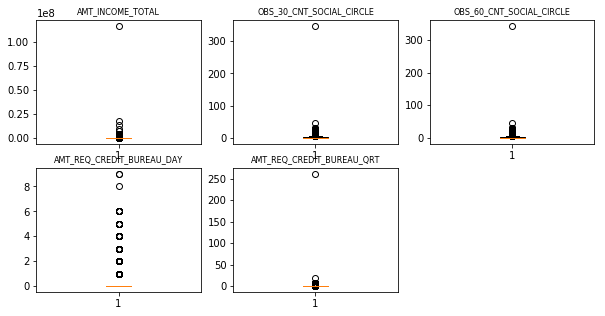

In [342]:
# 將超過80倍標準差之值選出，重新繪製boxplot
plt.figure(figsize=(10, 5))
for i in range(len(stdlist)):
    plt.subplot(2, 3, i+1)
    plt.boxplot(app_f[stdlist[i]].dropna()) # boxplot 如遇na值，無法呈現，因此先以「跳過」na值的方式呈現，其它數值
    plt.title(stdlist[i], size = 8)

In [ ]:
# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

In [158]:
from statsmodels import distributions

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [352]:
# 撰寫比較ECDF比較物件

class AutoDraw:
    
    def __init__(self,col):
        np.random.seed(123)
        self.__test = np.random.randn(len(col.dropna()))
        self.__norm = distributions.ECDF(self.__test)
        self.cdf = distributions.ECDF(col.dropna())
        self.__col = col
        
    def draw(self, state=None):
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.plot(self.cdf.x, self.cdf.y)
        plt.plot(self.__norm.x, self.__norm.y, '--')
        plt.title('Nomal V.S' + ' ' + str(state))
        plt.xlabel('Value')
        plt.ylabel('ECDF')
        plt.legend(['Empirical CDF','NormCDF'])
        
        plt.subplot(1,2,2)
        self.__col.hist()
        
    #def His(self, draw):
        #draw.hist()
        #plt.title(str(draw))
        #plt.show()
        
    def __del__(self):
        print('DEL OO')
        
        
    

DEL OO


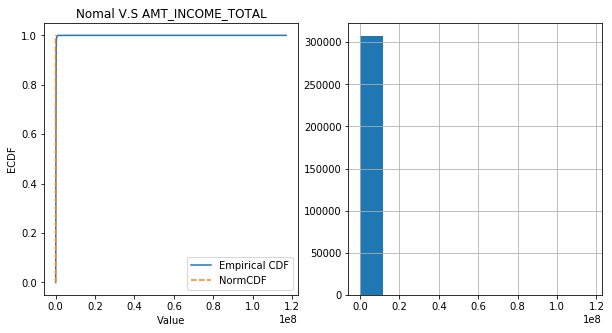

In [353]:
# AMT_INCOME_TOTAL
AMT = AutoDraw(col=app_f['AMT_INCOME_TOTAL'])
AMT.draw(state = 'AMT_INCOME_TOTAL')

DEL OO


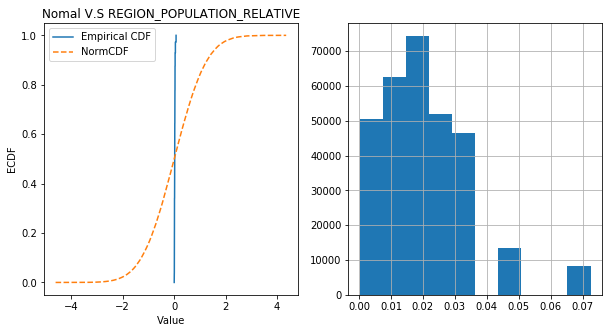

In [354]:
# REGION_POPULATION_RELATIVE
RPR = AutoDraw(app_f['REGION_POPULATION_RELATIVE'])
RPR.draw('REGION_POPULATION_RELATIVE')

DEL OO


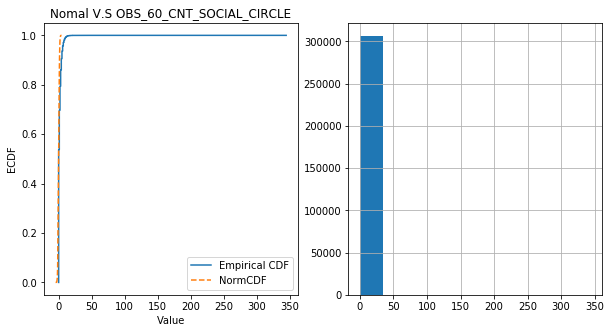

In [355]:
# OBS_60_CNT_SOCIAL_CIRCLE
OCS = AutoDraw(app_f['OBS_60_CNT_SOCIAL_CIRCLE'])
OCS.draw('OBS_60_CNT_SOCIAL_CIRCLE')

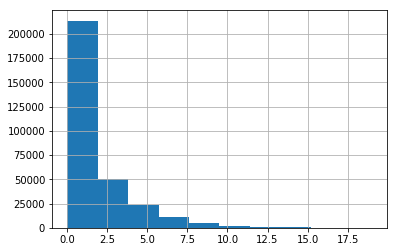

In [370]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
loca = app_f['OBS_60_CNT_SOCIAL_CIRCLE'][app_f['OBS_60_CNT_SOCIAL_CIRCLE'] < 20]
loca.hist()